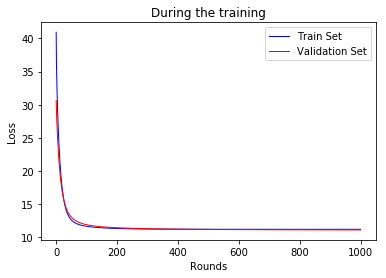

In [1]:
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split
import scipy.sparse
import numpy as np
import matplotlib.pyplot as plt

# load the data file
data = load_svmlight_file('housing_scale.txt')

# split the data into training set and alidation set
X_train, X_test, Y_train, Y_test = train_test_split(data[0], data[1], test_size=0.25, random_state=42)  # Y = MX + b
X_train = np.asarray(scipy.sparse.csr_matrix(X_train).todense())
Y_train = np.asarray(scipy.sparse.csr_matrix(Y_train).todense())
X_test = np.asarray(scipy.sparse.csr_matrix(X_test).todense())
Y_test = np.asarray(scipy.sparse.csr_matrix(Y_test).todense())

row = X_train.shape[0]
column = X_train.shape[1]
testrow = X_test.shape[0]
testcolumn = X_test.shape[1]

# Initialize the parameter
X = np.hstack((X_train, np.ones((row, 1))))  # Let the last column in X to be 1
learning_rate = 0.0005
W = np.zeros((column + 1, 1))  # Merge the W and b
gradient_rounds = 1000  # rounds for training

# pyplot initial
plt.figure(1)
plt.subplot(111)
xplot = []
yplot = []
yplotV = []
for i in range(gradient_rounds):
    gradient = -np.dot(X.T, (np.dot(X, W) - Y_train.T))  # Compute the gradient
    W = W + np.reshape(learning_rate * gradient, (column + 1, 1))  # Update the W
    xplot.append(i)
    loss = 0
    for each in range(row):
        loss += pow(Y_train.T[each] - np.dot(X[each], W), 2)  # Compute the loss in train set
    yplot.append(0.5 * loss / row)
    loss = 0
    for each in range(testrow):
        eachx = X_test[each]
        x = np.hstack((eachx, 1))
        loss += pow((Y_test.T[each] - np.dot(x, W)), 2)  # Compute the loss in validation set
    yplotV.append(0.5 * loss / testrow)
plt.title('During the training')
plt.xlabel('Rounds')
plt.ylabel('Loss')
plt.plot(np.array(xplot), np.array(yplot),color="blue", linewidth=1.0, linestyle="-", label="Train Set")
plt.plot(np.array(xplot), np.array(yplotV),color="red", linewidth=1.0, linestyle="-", label="Validation Set")

plt.legend(loc='upper right')

plt.show()
